# CHAPTER 27: Mean-Square-error Inference

### This code generates figures 1, 3, 6, 8, 11 from Chapter 27: Mean-Square-Error Inference (vol II)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

required libraries:
    
1. numpy
2. matplotlib
3. sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import sklearn

## Example 27.2 (Predicting a crime statistic)
The US Federal Bureau of Investigation (FBI) publishes statistics on the crime rates in the country on an annual basis. Figure $27.1$ plots the burglary rates per 100,000 inhabitants for the period 1997--2016.  Assume we model the annual burglary rate as a random variable $\mathcal{x}$ with some mean $\bar{x}$. By examining the plot, we find that this assumption is more or less reasonable only over the shorter range 2000--2009 during which the burglary rate remained practically flat with fluctuations around some nominal average value. The rates are declining before 2000 and after 2010. Assume we did not know the burglary rate for the year 2010 and wanted to predict its value from the burglary rates observed in prior years.  In this example, the  probability distribution of $\mathcal{x}$ is not known to evaluate its mean $\bar{x}$. Instead, we have access to measurements for the years 1997--2015. We can use the data from the years 2000--2009 to compute a sample mean and use it to predict $x(2010)$:
$$
    \widehat{x}(2010)=\frac{1}{10}\sum_{n=2000}^{2009} x(n)\approx  732.6 \tag{27.12}
$$

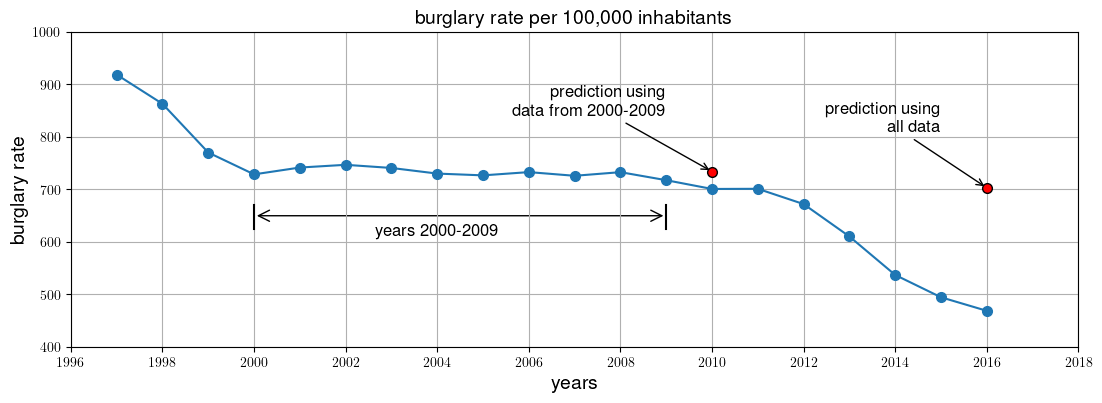

In [15]:
X = np.load('data/FBIdata.npy')     # a table is loaded into a variable X
H = np.array([X[:,0].astype(int), X[:,9]])  # column 0 is years, and column 9 is burglary rate

#figure 1 (crime statistic)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13,9
fig = plt.figure()

# subplot-1
ax = fig.add_subplot(211)
ax.plot(H[0,:],H[1,:],'-o', markersize=7)
ax.set_xlabel(r'years', fontsize=14)
ax.set_ylabel(r'burglary rate', fontsize=14)
ax.set_ylim([400, 1000])
ax.set_xlim([1996, 2018])
plt.xticks(np.arange(min(H[0,:])-1, max(H[0,:])+4, 2))
ax.grid()
ax.set_title(r'burglary rate per 100,000 inhabitants', fontsize=14)

N = np.max(H.shape)

ax.plot(H[0,N-1], np.mean(H[1,0:N]),'-ro', markersize=7, markeredgecolor='black'); # mean of years 1997-2015
ax.plot(H[0,13], np.mean(H[1,3:12]),'-ro', markersize=7, markeredgecolor='black'); # mean of years 2000-2009

# Add some annotations to the plot
plt.annotate('prediction using \n all data', xy= (H[0,N-1], np.mean(H[1,0:N])), xytext= (H[0,N-1]-1, np.mean(H[1,0:N])+100), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold',ha='right', va='bottom')
plt.annotate('prediction using \n data from 2000-2009', xy= (H[0,13], np.mean(H[1,3:12])), xytext= (H[0,13]-1, np.mean(H[1,3:12])+100), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold',ha='right', va='bottom')
arrow = FancyArrowPatch((2000,650), (2009,650), arrowstyle='<->', mutation_scale=20, color='black') # Draw the arrow to highlight the years between 2000-2009
ax.add_patch(arrow)
ax.axvline(2000, color='black', linestyle='-', ymin=0.375, ymax=0.45) # Draw the vertical lines at start and end points
ax.axvline(2009, color='black', linestyle='-', ymin=0.375, ymax=0.45)
ax.text(2004, 610, 'years 2000-2009', ha='center', fontsize=12)

plt.show()

**Figure 27.1** Plot of the annual bulglary rates per 100,000 inhabitants in the United States during 1997-2016. US Crimininal Justice Information Services Division. Data found at https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-1 .

The value $732.6$  is close enough to the actual burglary rate observed for 2010, which is $701$. If we were instead to predict the burglary rate for the year 2016 by using the data for the entire  period 1997--2015, we would end up with 
$$ \widehat{x}(2016)\approx 715.5 \tag{27.13}
$$
which is clearly a bad estimate since the actual value is $468.9$.
 
This example illustrates the fact that we will often be dealing with distributions that vary (i.e., drift) over time for various reasons, such as changing environmental conditions or, in the case of this example, crime deterrence policies that may have been put in place.  This possibility necessitates the development of inference  techniques that are able to adapt to variations in the statistical properties of the data in an $ \textit{automated}$ manner. In this example, the statistical properties of the data during the period 2000--2009 are clearly different from the periods before 2000 and after 2009. 

## Example 27.3 (From soft to hard decisions)

Figure $27.3$ plots the function $\text{tanh} (y)$. We see that it
tends to $\pm 1$ as $y\rightarrow \pm\infty$. For other values
of $y$, the function assumes real values that are distinct from $\pm
1$.

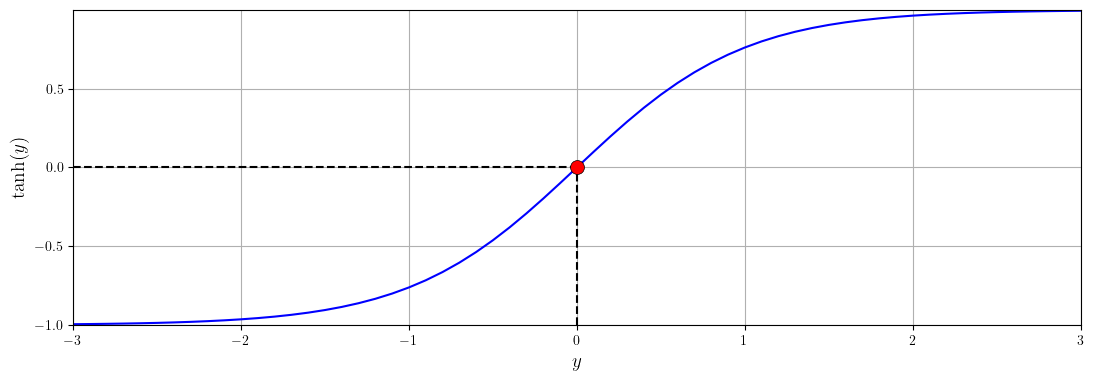

In [17]:
import numpy as np
import matplotlib.pyplot as plt

n=0
y_range = np.arange(-3, 3.1, 0.1)
h = np.zeros(y_range.size)
for y in y_range:
  h[n] = np.tanh(y)
  n=n+1

## figure 3 (plot of tanh function)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
plt.rcParams['figure.figsize']=13,9

fig = plt.figure()

# subplot-1
ax = fig.add_subplot(211)
ax.plot(y_range,h,'-b');
ax.set_xlabel(r'$y$', fontsize=14)
ax.set_ylabel(r'$\tanh(y)$', fontsize=14)
ax.set_ylim([-1, 1])
ax.set_xlim([-3, 3])
ax.grid()

# add some shapes to the figure
plt.yticks(np.arange(-1, 1, 0.5))
ax.axhline(0, color='black', linestyle='--', xmax=0.5) # draw a horizontal line
ax.axvline(0, color='black', linestyle='--', ymax=0.5) # draw a vertical line
ax.scatter(0, 0, color='red', marker='o', s=100, edgecolors= 'k', linewidths=0.5, zorder=2) # add a point to (0,0)

plt.show()

**Figure 27.3** a plot of the hyperbolic tangent function, $tanh(y)$. Observe that the curve tends to $\pm1$ as $t \to \pm \infty$.

## Example 27.4 (Estimating petal length for Iris flowers)

Consider the data shown in  Figure $27.6$, which represent scatter diagrams for measurements about petal and sepal dimensions for three types of iris flowers (setosa, versicolor, and virginica). The flowers are shown in Fig. $27.5$. 

 Each row in Fig. $27.6$ corresponds to one flower type and includes two plots showing the scatter diagrams for the sepal width $\times$ sepal length and petal width $\times$ petal length for the flower. There are 50 data measurements in each diagram and all dimensions are measured in centimeters. The axes in the figure are normalized to similar scales to facilitate comparison.

mean values for Iris Setosa: sepal length, sepal width, petal length, petal width
[5.006 3.428 1.462 0.246]
mean values for Iris Versicolor: sepal length, sepal width, petal length, petal width
[5.936 2.77  4.26  1.326]
mean values for Iris Virginica: sepal length, sepal width, petal length, petal width
[6.588 2.974 5.552 2.026]


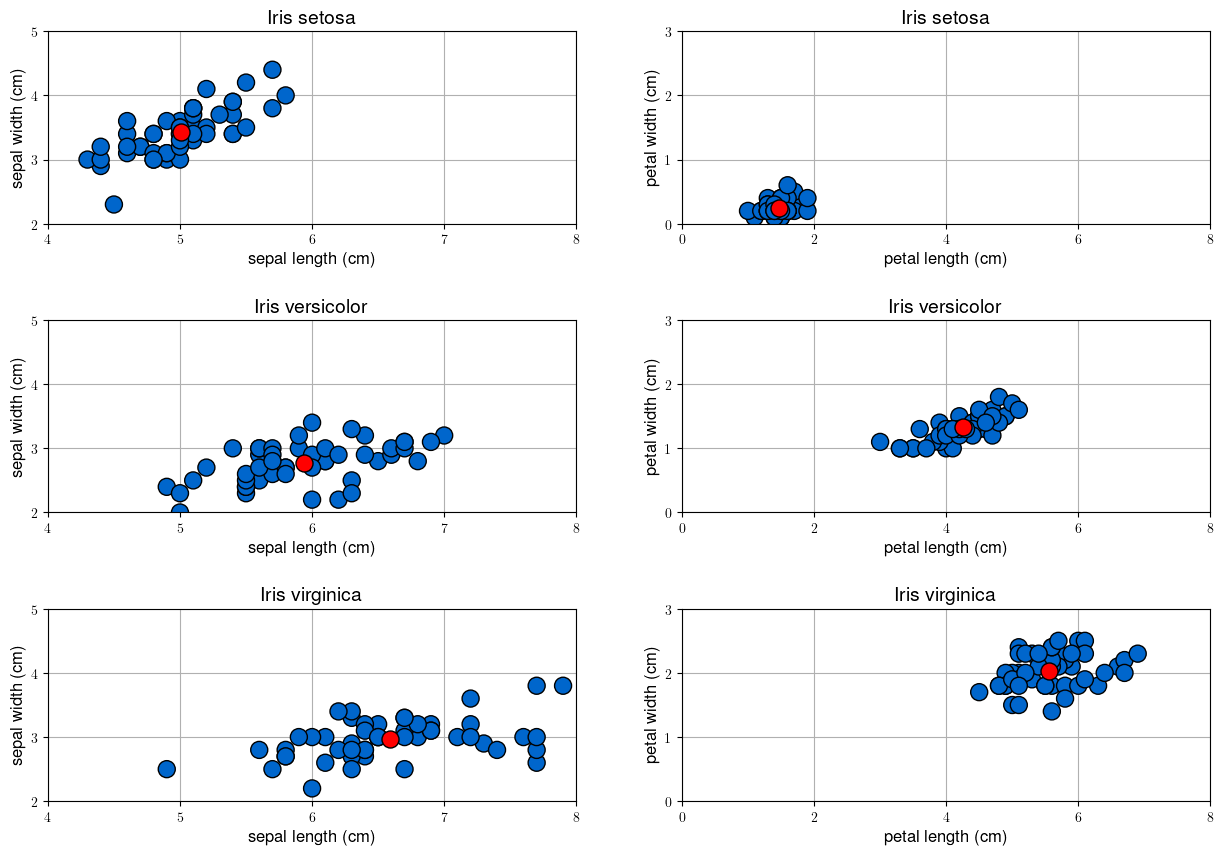

In [19]:
from sklearn.datasets import load_iris

data = load_iris() # loaded into variable data
Ntotal = 150 # total number of data points
features = data['data']  # each row is a feature vector with 4 attributes (petal length, petal width, sepal length, sepal width)
labels = data['target']  # entry entry is 0=setosa, 1=versicolor, 2=virginia

# separating features by class
# class 0 (Setosa)
counter_0=0
counter_1=0
counter_2=0

features_0 = np.zeros([50, 4])
features_1 = np.zeros([50, 4])
features_2 = np.zeros([50, 4])

for n in range(Ntotal):
    if labels[n] == 0:
        features_0[counter_0,:] = features[n,:];
        counter_0=counter_0+1;
    elif labels[n] == 1:
        features_1[counter_1,:] = features[n,:];
        counter_1=counter_1+1;
    elif labels[n] == 2:
        features_2[counter_2,:] = features[n,:];
        counter_2=counter_2+1;
        
print('mean values for Iris Setosa: sepal length, sepal width, petal length, petal width')
a0= np.mean(features_0,axis=0)
print(a0)

print('mean values for Iris Versicolor: sepal length, sepal width, petal length, petal width')
a1 = np.mean(features_1,axis=0)
print(a1)

print('mean values for Iris Virginica: sepal length, sepal width, petal length, petal width')
a2 = np.mean(features_2,axis=0)
print(a2)

N3 = np.max(features_0.shape);
C3 = np.ones([N3,1]); # color map
S3 = 150*np.ones([N3,1]);

#figure 6 (sepal length x sepal width)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
fig, axs = plt.subplots(3, 2, figsize=(15, 10),gridspec_kw={'hspace': 0.5})

axs[0, 0].scatter(features_0[:,0], features_0[:,1],S3,color= (0, 0.4, 0.8),edgecolors='k', linewidth=1, zorder=2)
axs[0, 0].set_xlabel(r'sepal length (cm)', fontsize=12)
axs[0, 0].set_ylabel(r'sepal width (cm)', fontsize=12)
axs[0, 0].set_title(r'Iris setosa', fontsize=14)
axs[0, 0].grid()
axs[0, 0].set_xlim([4, 8])
axs[0, 0].set_ylim([2, 5])
axs[0, 0].scatter(a0[0],a0[1],150, color= (1, 0, 0), edgecolors='k', linewidth=1, zorder=2)
axs[0, 0].set_xticks(np.arange(4, 9, 1))
axs[0, 0].set_yticks(np.arange(2, 6, 1))

axs[0, 1].scatter(features_0[:,2], features_0[:,3],S3,color= (0, 0.4, 0.8),edgecolors='k',linewidths=1, zorder=2)
axs[0, 1].set_xlabel(r'petal length (cm)', fontsize=12)
axs[0, 1].set_ylabel(r'petal width (cm)', fontsize=12)
axs[0, 1].set_title(r'Iris setosa', fontsize=14)
axs[0, 1].grid()
axs[0, 1].set_xlim([0, 8])
axs[0, 1].set_ylim([0, 3])
axs[0, 1].scatter(a0[2],a0[3],150, color= (1, 0, 0),edgecolors='k',linewidths=1, zorder=2)
axs[0, 1].set_xticks(np.arange(0, 9, 2))
axs[0, 1].set_yticks(np.arange(0, 4, 1))

axs[1, 0].scatter(features_1[:,0], features_1[:,1],S3,color= (0, 0.4, 0.8),edgecolors='k',linewidths=1, zorder=2)
axs[1, 0].set_xlabel(r'sepal length (cm)', fontsize=12)
axs[1, 0].set_ylabel(r'sepal width (cm)', fontsize=12)
axs[1, 0].set_title(r'Iris versicolor', fontsize=14)
axs[1, 0].grid()
axs[1, 0].set_xlim([4, 8])
axs[1, 0].set_ylim([2, 5])
axs[1, 0].scatter(a1[0],a1[1],150, color= (1, 0, 0),edgecolors='k',linewidths=1, zorder=2)
axs[1, 0].set_xticks(np.arange(4, 9, 1))
axs[1, 0].set_yticks(np.arange(2, 6, 1))

axs[1, 1].scatter(features_1[:,2], features_1[:,3],S3,color= (0, 0.4, 0.8),edgecolors='k',linewidths=1, zorder=2)
axs[1, 1].set_xlabel(r'petal length (cm)', fontsize=12)
axs[1, 1].set_ylabel(r'petal width (cm)', fontsize=12)
axs[1, 1].set_title(r'Iris versicolor', fontsize=14)
axs[1, 1].grid()
axs[1, 1].set_xlim([0, 8])
axs[1, 1].set_ylim([0, 3])
axs[1, 1].scatter(a1[2],a1[3],150, color= (1, 0, 0),edgecolors='k',linewidths=1, zorder=2)
axs[1, 1].set_xticks(np.arange(0, 9, 2))
axs[1, 1].set_yticks(np.arange(0, 4, 1))

axs[2, 0].scatter(features_2[:,0], features_2[:,1],S3,color= (0, 0.4, 0.8),edgecolors='k',linewidths=1, zorder=2)
axs[2, 0].set_xlabel(r'sepal length (cm)', fontsize=12)
axs[2, 0].set_ylabel(r'sepal width (cm)', fontsize=12)
axs[2, 0].set_title(r'Iris virginica', fontsize=14)
axs[2, 0].grid()
axs[2, 0].set_xlim([4, 8])
axs[2, 0].set_ylim([2, 5])
axs[2, 0].scatter(a2[0],a2[1],150, color= (1, 0, 0),edgecolors='k',linewidths=1, zorder=2)
axs[2, 0].set_xticks(np.arange(4, 9, 1))
axs[2, 0].set_yticks(np.arange(2, 6, 1))

axs[2, 1].scatter(features_2[:,2], features_2[:,3],S3,color= (0, 0.4, 0.8),edgecolors='k',linewidths=1, zorder=2)
axs[2, 1].set_xlabel(r'petal length (cm)', fontsize=12)
axs[2, 1].set_ylabel(r'petal width (cm)', fontsize=12)
axs[2, 1].set_title(r'Iris virginica', fontsize=14)
axs[2, 1].grid()
axs[2, 1].set_xlim([0, 8])
axs[2, 1].set_ylim([0, 3])
axs[2, 1].scatter(a2[2],a2[3],150, color= (1, 0, 0),edgecolors='k',linewidths=1, zorder=2)
axs[2, 1].set_xticks(np.arange(0, 9, 2))
axs[2, 1].set_yticks(np.arange(0, 4, 1))

plt.show()

**Figure 27.6** Each row shows a scatter diagram for the sepal width $\times$ sepal length and petal width $\times$ petal length for one type of iris flower: *(top)* setosa, *(middle)* versicolor, and *(bottom)* virginica. The red circles in the "center" of the scatter diagrams correspond to the centers of gravity of the plots whose coordinates correspond to the mean values of the vertical and horizontal dimensions. The iris dataset is available from https://archive.ics.uci.edu/ml/datasets/iris.

Let us model the petal length of a flower as some random variable $\mathcal{x}$. Let us also model the flower type as another random variable $\mathcal{y}$, which assumes one of three discrete values: setosa, versicolor, and virginica. Given that we observe a setosa flower at random, we would like to estimate its petal length. We can do so by computing $\mathbb{E}(\mathcal{x}|\mathcal{y})$. However, we do not have any information about the conditional distribution $f_{\mathcal{x}|\mathcal{y}}(x|y)$.
<br>
<table>
  <caption><b>Average dimensions measured in centimeters for the three types of iris flowers computed from the available data measurements.</b></caption>
  <tr style="background-color: lightgray;">
    <th>Flower</th>
    <th>Sepal length</th>
    <th>Sepal width</th>
    <th>Petal length</th>
    <th>Petal width</th>
  </tr>
  <tr>
    <td>setosa</td>
    <td>5.0060</td>
    <td>3.4180</td>
    <td><b>1.4640</b></td>
    <td>0.2440</td>
  </tr>
  <tr>
    <td>versicolor</td>
    <td>5.9360</td>
    <td>2.7700</td>
    <td>4.2600</td>
    <td>1.3260</td>
  </tr>
  <tr>
    <td>virginica</td>
    <td>6.5880</td>
    <td>2.9740</td>
    <td>5.5520</td>
    <td>2.0260</td>
  </tr>
</table>
<br>
Still, we can use the available measurements to approximate $\mathbb{E}(\mathcal{x}|\mathcal{y})$ and estimate the petal length for the new setosa flower. Table $27.1$ lists the sample average values for the petal length, petal width, sepal length, and sepal width for the three types of flowers from the  available data; each graph has $50$ points. From the table we estimate for $\mathcal{y}=\text{setosa}$:
$$
\text{predicted petal length}\;=\; 1.4640\;\text{cm}\;\approx\;{\mathbb{E}(\mathcal{x}|\mathcal{y}=\text {setosa})}
$$

## Example 27.8 (Illustrating the bias-variance relation)

We reconsider the setting of Example $27.3$ where we are interested in estimating a binary random variable $\mathbf{x}\in\{\pm 1\}$ from noisy measurements $\mathbf{y}=\mathbf{x}+\mathbf{v}$ under zero-mean Gaussian noise with variance $\sigma_v^2$. We know from the derivation that led to ($27.33$), as well as from the result of Prob. $27.2$, that the optimal MSE estimator for $\mathbf{x}$ is given by 

$$
\widehat{\mathbf{x}} = \tanh\left(\frac{\mathbf{y}}{\sigma_v^2}\right) \quad \text{(27.84)}
$$

We simulate this solution by generating $N=50,000$ random samples $\mathbf{x}$ chosen uniformly from $\{+1,-1\}$. We index the samples by the letter $n$ and write $x_n$ to refer to the $n$th sample. Each $x_n$ is perturbed by a noise component $v_n$ generated from a zero-mean Gaussian distribution with variance $\sigma_v^2=0.1$. The observation is denoted by $y_n=x_n+v_n$. For each of the noisy measurements $y_n$, expression ($27.84$) is used to estimate the corresponding $x_n$ as follows:

$$
\widehat{x}_n = \tanh\left(\frac{y_n}{\sigma_v^2}\right) \quad \text{(27.85)}
$$

where we are assuming knowledge of the noise variance in this example. The MSE for this  construction can be estimated by computing the sample error variance over all $N=50,000$ trials:

$$
\text{MMSE} \approx \frac{1}{N} \sum_{n=0}^{N-1} (x_n - \widehat{x}_n)^2 \approx 0.0021 \quad \text{(optimal MSE)} \quad \text{(27.86)}
$$

### First-order linear estimator

Next, we examine four suboptimal estimators, evaluate their MSEs from data measurements, and verify that these MSEs satisfy the bias--variance relation ($27.75$).

We consider initially a first-order linear regression model for estimating $x$ from $y$ of the form:

$$
\widehat{x}_a = \alpha^{\star} y - \theta^{\star} \quad \text{(27.87)}
$$

where the parameters $(\alpha^{\star},\theta^{\star})$ are determined from minimizing the squared  error defined earlier by ($27.68$):

$$
(\alpha^{\star}, \theta^{\star}) \triangleq \underset{\alpha, \theta}{\text{argmin}} \left\{\frac{1}{N}\sum_{n=0}^{N-1} \left(x_n - (\alpha y_n - \theta)\right)^2\right\} \quad \text{(27.88)}
$$

We already know that the solution is given by expressions ($27.70a$)--($27.70b$). Before examining the performance of this estimator, and before introducing three other suboptimal estimators of higher order, we will first rewrite model ($27.87$) in a useful vector form that will be more convenient for these other estimators.

Thus, note that we can rewrite ($27.87$) as 

$$
\widehat{x}_a = \begin{bmatrix} 1 & y \end{bmatrix} \begin{bmatrix} -\theta^{\star} \\ \alpha^{\star} \end{bmatrix} \quad \text{(27.89)}
$$

We introduce the matrix and vector quantities:

$$
H \triangleq \begin{bmatrix} 1 & y_0 \\ 1 & y_1 \\ 1 & y_2 \\ \vdots & \vdots \\ 1 & y_{N-1} \end{bmatrix}, \quad d \triangleq \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_{N-1} \end{bmatrix}, \quad w \triangleq \begin{bmatrix} -\theta \\ \alpha \end{bmatrix} \quad \text{(27.90)}
$$

so that problem ($27.88$) can be written more succinctly in the least-squares form:

$$
w^{\star} \triangleq \underset{w \in \mathbb{R}^{2}}{\textit{argmin}} \, \|d - Hw\|^2 \quad \text{(4)} \quad \text{(27.91)}
$$

where the scaling by $1/N$ is inconsequential and is removed. If we set the gradient vector of this cost function relative to $w$ to zero at $w = w^{\star}$, i.e.,

$$
2H^{\sf T}(d - Hw)\Biggr|_{w = w^{\star}} = 0 \quad \text{(27.92)}
$$

we find that the solution $w^{\star}$, whose entries are $w^{\star} = \begin{bmatrix} -\theta^{\star} \\ \alpha^{\star} \end{bmatrix}$, is given by

$$
w^{\star} = (H^{\sf T} H)^{-1} H^{\sf T} d \quad \text{(27.93)}
$$

It is straightforward to verify that this expression for $w^{\star}$ leads to the same expressions ($27.70a$)--($27.70b$) for $(\alpha^{\star}, \theta^{\star})$ --- see Prob. $27.14$. We now proceed to evaluate the MSE, bias effect, and variance effect for this first-order estimator from experimental data.

For this purpose, we perform the following repeated experiments to generate multiple data-based estimators and then use these estimators to approximate the bias and variance effects. We index each experiment by the letter $\ell$, for $\ell=1,2,\ldots, L$, where $L=200$. For each experiment, we generate $N_{\ell}=1000$ data samples $\{(x_n^{(\ell)},y_n^{(\ell)})\}$ in the same manner described before and use these samples to construct the data quantities $\{H^{(\ell)},d^{(\ell)}\}$ and estimate the parameters $(\alpha^{(\ell)\star},\theta^{(\ell)\star})$ for the $\ell$th experiment. In other words, each collection of data points $\{(x_n^{(\ell)},y_n^{(\ell)})\}$ gives rise to an estimator whose mapping is given by:

$$
\widehat{x}_a^{(\ell)} = \alpha^{(\ell)\star} y - \theta^{(\ell)\star}, \quad \ell = 1,2,\ldots,L \quad \text{(27.94)}
$$

Obviously, if we now apply these estimators to the original $N=50,000$ data points $\{(x_n,y_n)\}$, then each of them will take the same observation $y_n$ and generate an estimate $\widehat{x}_n^{(\ell)}$ for the corresponding $x_n$. We therefore note that, for the same observation $y$, there will be some variability in the estimates for its $x$-component. This variability gives rise to the bias and variance effects, whose sizes can be evaluated as explained next.

First, for each $y_n$ we obtain a collection of $L$-estimates for its $x$-component denoted by:

$$
\widehat{x}_n^{(\ell)} = {\alpha}^{(\ell)\star} y_n - {\theta}^{(\ell)\star}, \quad \ell = 1,2,\ldots,L \quad \text{(27.95)}
$$

We use these estimates to estimate the MSE for the first-order estimator by using:

$$
\begin{align*} &
\text{mse}_1 \equiv \mathbb{E}_{\mathbf{x},\mathbf{y},\mathbf{\cal D}}\left(\mathbf{x} - c_{\mathbf{\cal D}}(\mathbf{y})\right)^2 \\&
\approx \frac{1}{L}\sum_{\ell=1}^{L}\left(\frac{1}{N}\sum_{n=0}^{N-1} \left(x_n - \widehat{x}_n^{(\ell)}\right)^2\right) \\ &
\approx 0.0913 \tag{27.96}
\end{align*}
$$

where the subscript $1$ refers to the fact that this is the MSE for the first-order estimator, and where we are averaging over all experiments.

Next, we evaluate the bias and variance effects. If we average the model parameters $\{\alpha^{(\ell)\star},\theta^{(\ell)\star}\}$ across all $L$ experiments, we obtain an approximation for the mean estimator, $\mathbb{E}[c_{\mathbf{\cal D}}(y)]$, whose structure will take the form:

$$
\widehat{x}_a^{\text{mean}} = \bar{\alpha}^{\star} y - \bar{\theta}^{\star} \quad \text{(mean estimator, }\mathbb{E}[c_{\mathbf{\cal D}}(y)]\text{)} \quad \text{(27.97)}
$$

in terms of the sample average coefficients:

$$
\bar{\alpha}^{\star} = \frac{1}{L}\sum_{\ell=1}^{L} \alpha^{(\ell)\star}, \quad \bar{\theta}^{\star} = \frac{1}{L}\sum_{\ell=1}^{L}\theta^{(\ell)\star} \quad \text{(27.98)}
$$

For each of the original measurements $y_n$, we use this average estimator to estimate its $x$-component and denote the estimates by:

$$
\widehat{x}_n^{\text{mean}} = \bar{\alpha}^{\star} y_n - \bar{\theta}^{\star} \quad \text{(27.99)}
$$

These estimates can be used to approximate the bias term relative to the earlier optimal estimates $\widehat{x}_n$:


$$
\begin{align*} &
\text{bias}_1^2 \triangleq \mathbb{E}_{\mathbf{y}}\left(c^o(\mathbf{y})-\mathbb{E}[c_{\mathbf{\mathcal{D}}}(\mathbf{y})]\right)^2 \\ &
\approx \frac{1}{N}\sum_{n=0}^{N-1} \left(\widehat{x}_n - \widehat{x}_n^{\text{mean}}\right)^2 \\ &
\approx 0.0893 \tag{27.100}
\end{align*}
$$

We similarly approximate the variance effect by using:

$$
\begin{align*}
\text{variance}_1 \triangleq \mathbb{E}_{\mathbf{\cal D}}\left(c_{\mathbf{\cal D}}(\mathbf{y})-\mathbb{E}[c_{\mathbf{\mathcal{D}}}(\mathbf{y})]\right)^2 \\
\approx \frac{1}{L}\sum_{\ell=1}^L\left(\frac{1}{N}\sum_{n=0}^{N-1} \left(\widehat{x}_n^{(\ell)} - \widehat{x}_n^{\text{mean}}\right)^2\right) \\
\approx 0.0002 \tag{27.101}
\end{align*}
$$



### Higher-order estimator

We repeat similar calculations for higher-order estimators, such as a third-order estimator of the form:

$$
\widehat{x}_a = \alpha^{\star} y + \beta^{\star} y^2 + \lambda^{\star} y^3 - \theta^{\star} \quad \text{(27.102)}
$$

where the parameters $(\alpha^{\star},\beta^{\star},\lambda^{\star},\theta^{\star})$ are determined by minimizing the squared error defined by:

$$
(\alpha^{\star},\beta^{\star},\lambda^{\star},\theta^{\star}) \equiv \underset{\alpha,\beta,\lambda,\theta}{\textit{argmin}}\Bigg\{\frac{1}{N}\sum_{n=0}^{N-1} \Bigl(x_n-(\alpha y + \beta y^2 + \lambda y^3 - \theta)\Bigr)^2\Bigg\}  \quad \text{(27.103)}
$$

The solution can be found by introducing the matrix and vector quantities:

$$
H \triangleq \begin{pmatrix}1&y_0&y_0^2&y_0^3\\1&y_1&y_1^2&y_1^3\\1&y_2&y_2^2&y_2^3\\\vdots&\vdots\\\vdots&\vdots&\vdots&\vdots\\1&y_{N-1}&y_{N-1}^2&y_{N-1}^3\end{pmatrix}, \quad d \triangleq \begin{pmatrix}x_0\\x_1\\x_2\\\vdots\\x_{N-1}\end{pmatrix}, \quad w \triangleq \begin{pmatrix}-\theta\\\alpha\\\beta\\\lambda\end{pmatrix} \quad \text{(27.104)}
$$

and considering the same least-squares problem ($27.91$) for which ($27.93$) continues to hold. We can then evaluate the MSE, bias effect, and variance effect for this third-order estimator as follows.

For each experiment with $N_{\ell}=1000$ data points $\{(x_n^{(\ell)},y_n^{(\ell)})\}$, we construct the data quantities $\{H^{(\ell)},d^{(\ell)}\}$ and estimate the parameter vector $w^{(\ell)\star}$. Then, the structure of the estimator resulting from the $\ell$th experiment is given by:

$$
\widehat{x}_a^{(\ell)} = h^{\sf T} w^{(\ell)\star}, \quad \ell=1,2,\ldots,L \quad \text{(27.105)}
$$

where the data vector $h$ is constructed as follows:

$$
h = \begin{pmatrix}1\\y\\y^2\\y^3\end{pmatrix} \quad \text{(27.106)}
$$

We apply each of the estimators $w^{(\ell)\star}$ to the data vector $h_n$ corresponding to $y_n$ to estimate its $x$-component:

$$
\widehat{x}_n^{(\ell)} = h_n^{\sf T} w^{(\ell)\star}, \quad \ell=1,2,\ldots,L \quad \text{(27.107)}
$$

and use these values to approximate the MSE for the third-order estimator by using:

$$
\begin{align*} &
\text{mse}_3 \equiv \mathbb{E}_{\mathbf{x},\mathbf{y},\mathbf{\cal D}}\left(\mathbf{x} - c_{\mathbf{\cal D}}(\mathbf{y})\right)^2 \\ &
\approx \frac{1}{L}\sum_{\ell=1}^{L}\left(\frac{1}{N}\sum_{n=0}^{N-1} \left(x_n - \widehat{x}_n^{(\ell)}\right)^2\right)
\approx 0.0305 \tag{27.108} 
\end{align*}
$$

where the subscript $3$ refers to the fact that this is the MSE for the third-order estimator.

If we average the model parameters $\{w^{(\ell)\star}\}$ across the $L=200$ experiments we obtain an approximation for the mean estimator whose structure has the form:

$$
\widehat{x}_n^{\text{mean}} = h^{\sf T} \bar{w}^{\star} \quad \text{(mean estimator, $\mathbb{E}[c_{{\mathcal{D}}}(y)]$)}
\quad \text{(27.109)}
$$

in terms of the average model:

$$
\bar{w}^{\star} = \frac{1}{L}\sum_{\ell=1}^{L} w^{(\ell)\star} \quad \text{(27.110)}
$$

For each of the original measurements $y_n$, we use this average estimator to estimate its $x$-component as well and denote the estimates by:

$$
\widehat{x}_n^{\text{mean}} = h_n^{\sf T} \bar{w}^{\star} \quad \text{(27.111)}
$$

These values can be used to approximate the bias term:

$$
\begin{align*} &
\text{bias}_3^2 \equiv \mathbb{E}_{\mathbf{y}}\left(c^o(\mathbf{y}) - \mathbb{E}[c_{{\mathcal{D}}}(\mathbf{y})]\right)^2 \\ &
\approx \frac{1}{N}\sum_{n=0}^{N-1} \left(x_n - \widehat{x}_n^{\text{mean}}\right)^2 \\ &
\approx 0.0283 \tag{27.112}
\end{align*}
$$

We similarly approximate the variance effect by computing:

$$
\begin{align*} &
\text{variance}_3 \equiv \mathbb{E}_{{\mathcal{D}}}\left(c_{{\mathcal{D}}}(\mathbf{y}) - \mathbb{E}[c_{{\mathcal{D}}}(\mathbf{y})]\right)^2 \\ &
\approx \frac{1}{L}\sum_{\ell=1}^L\left(\frac{1}{N}\sum_{n=0}^{N-1} \left(\widehat{x}_n^{(\ell)} - \widehat{x}_n^{\text{mean}}\right)^2\right) \\ &
\approx 0.0003 \tag{27.113}
\end{align*}
$$

We repeat the same construction for two other estimators of orders $5$ and $7$, respectively, where their $h_n$ vectors are constructed as follows:

$$
\begin{align*} &
h_n = [1 \text{  } \mathcal{y}_n \text{  } \mathcal{y}_n^2 \text{  } \mathcal{y}_n^3 \text{  } \mathcal{y}_n^4 \text{  } \mathcal{y}_n^5] \quad (\text{5th order}) \tag{27.114} \\ &
h_n = [1 \text{  } \mathcal{y}_n \text{  } \mathcal{y}_n^2 \text{  } \mathcal{y}_n^3 \text{  } \mathcal{y}_n^4 \text{  } \mathcal{y}_n^5  \text{  } \mathcal{y}_n^6 \text{  } \mathcal{y}_n^7] \quad (\text{7th order}) \tag{27.115}
\end{align*}
$$


**Table 27.4** Mean-square-error, bias, and variance sizes for data-based estimators of first, third, fifth, and seventh order.
<table>
  <tr style="background-color: lightgray;">
    <th>Order</th>
    <th>MSE</th>
    <th>Bias$^2$</th>
    <th>Variance</th>
    <th>MMSE+bias$^2$+variance</th>
  </tr>
  <tr>
    <td>optimal (MMSE)</td>
    <td>0.0021</td>
    <td>0</td>
    <td>0</td>
    <td>0.0021</td>
  </tr>
  <tr>
    <td>1</td>
    <td><b>0.0913</b></td>
    <td>0.0893</td>
    <td>0.0002</td>
    <td><b>0.0916</b></td>
  </tr>
  <tr>
    <td>3</td>
    <td><b>0.0305</b></td>
    <td>0.0283</td>
    <td>0.0003</td>
    <td><b>0.0307</b></td>
  </tr>
  <tr>
    <td>5</td>
    <td><b>0.0154</b></td>
    <td>0.0128</td>
    <td>0.0007</td>
    <td><b>0.0156</b></td>
  </tr>
  <tr>
    <td>7</td>
    <td><b>0.0096</b></td>
    <td>0.0068</td>
    <td>0.0010</td>
    <td><b>0.0099</b></td>
  </tr>
</table>

Table $27.4$ lists the MSEs, squared bias terms, and variance terms for all estimators considered in this example. It is seen that as the complexity of the estimator increases from first order toward seventh order, the MSE improves, its bias effect also improves, while its variance effect worsens---this behavior is also illustrated in Fig.$27.11$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 50000      # number of realizations y and x
L = 200        # how many experiments
ND = 1000      # how many data points per experiment
sigmav2 = 0.1  # noise variance

# Optimal mean-square-error estimator (conditional mean)
# generate data
x = np.zeros([N,1])
for n in range(N) :
 a= np.random.rand()
 if a >= 1/2 : # generate N realizations of x uniformly; either +1 or -1
   x[n] = +1
 else :
   x[n] = -1

v = np.sqrt(sigmav2)*np.random.randn(N,1) # vector of Gaussian noise samples
y = x + v # observations
x_hat = np.tanh(y/sigmav2)    # vector of optimal estimates of x; one for each observation
mean_optimal = np.mean(x_hat) # mean of optimal estimator; should be 0
mmse = 0

mmse = np.mean((x - x_hat) ** 2)  # mmse of optimal estimator

print('mean of optimal estimator (should be ~0) and its mmse')
print(mean_optimal, mmse)

#### Next we consider a data-based estimator: we fit a line into the data
C = np.zeros([N,L])  # saves the estimates for the original x's over all L experiments
C2 = np.zeros([N,L]) # fitting a cubic curve
C3 = np.zeros([N,L]) # fitting a curve of order 5
C4 = np.zeros([N,L]) # fitting a curve of order 7
w = np.zeros([2,L])  # saves regression vector for every experiment (to average later)
w2 = np.zeros([4,L])  # saves regression vector for every experiment (to average later)
w3 = np.zeros([6,L])  # saves regression vector for every experiment (to average later)
w4 = np.zeros([8,L])  # saves regression vector for every experiment (to average later)

xx = np.zeros([ND,1])
for s in range(L) : # generating experiments
   for n in range(ND) :
        a= np.random.rand()
        if a >= 1/2 : # generate ND realizations of (x,y) with x uniformly; either +1 or -1
            xx[n] = +1
        else :
            xx[n] = -1

   
   Yx = xx + np.sqrt(sigmav2)*np.random.randn(ND, 1) # measurement vector

   # fitting a line
   H = np.column_stack((np.ones([ND,1]), Yx))  # data matrix
   a = np.linalg.inv(H.T @ H) @ H.T @ xx  # vector contains [-theta; alpha]=(inv(H'*H))*H'*xx
   w[:, s] = a[:, 0]
   C[:,s] = np.column_stack((np.ones([N,1]), y)) @ w[:,s]  # feeding original y to find hat_x_a

   if s==0 :
       xx_save = xx # save data from first experiment for plotting
       Y_save = Yx
       w_save = w[:,s]
   
   #fitting a cubic curve
   H2 = np.column_stack((np.ones([ND,1]), Yx, Yx**2, Yx**3))  # data matrix
   a = np.linalg.inv(H2.T @ H2) @ H2.T @ xx  # vector contains [-theta; alpha]=(inv(H'*H))*H'*xx
   w2[:, s] = a[:, 0]
   C2[:,s] = np.column_stack((np.ones([N,1]), y, y**2, y**3)) @ w2[:,s]  # feeding original y to find hat_x_a

    
   if s==0 :
       xx_save = xx # save data from first experiment for plotting
       Y_save = Yx
       w_save_2 = w2[:,s]

   #fitting a 5-th order curve  

   H3 = np.column_stack((np.ones([ND,1]), Yx, Yx**2, Yx**3, Yx**4, Yx**5))  # data matrix
   a = np.linalg.inv(H3.T @ H3) @ H3.T @ xx  # vector contains [-theta; alpha]=(inv(H'*H))*H'*xx
   w3[:, s] = a[:, 0]
   C3[:,s] = np.column_stack((np.ones([N,1]), y, y**2, y**3, y**4, y**5)) @ w3[:,s]  # feeding original y to find hat_x_a
    
   if s==0 :
       xx_save = xx # save data from first experiment for plotting
       Y_save = Yx
       w_save_3 = w3[:,s]
    
   #fitting a 7-th order curve  
   H4 = np.column_stack((np.ones([ND,1]), Yx, Yx**2, Yx**3, Yx**4, Yx**5, Yx**6, Yx**7))  # data matrix
   a = np.linalg.inv(H4.T @ H4) @ H4.T @ xx  # vector contains [-theta; alpha]=(inv(H'*H))*H'*xx
   w4[:, s] = a[:, 0]
   C4[:,s] = np.column_stack((np.ones([N,1]), y, y**2, y**3, y**4, y**5, y**6, y**7)) @ w4[:,s]  # feeding original y to find hat_x_a

   if s==0 :
       xx_save = xx # save data from first experiment for plotting
       Y_save = Yx
       w_save_4 = w4[:,s]

w_bar = np.mean(w, axis=1) # expected estimator (over data); contains [-\theta_mean \alpha_mean]
c_bar = np.tile((np.column_stack((np.ones([N,1]), y)) @ w_bar).reshape(-1, 1), (1, L))

c_var  = (np.linalg.norm(C - c_bar, ord='fro'))**2 / ((N * L) - 1)   # variance effect
bias   = (np.linalg.norm(x_hat-np.mean(c_bar,axis=1).reshape(-1, 1)))**2/N     # squared bias effect of suboptimal estimator
mmse_c = (np.linalg.norm(C- x @ np.ones([1,L]),'fro'))**2/(N*L) # mmse of suboptimal estimator

print('mmse optimal and mmse of suboptimal LINEAR estimator vs bias-variance relation: should be ~ equal')
print(mmse, mmse_c, mmse+bias+c_var)

print('mmse bias  variance Ec(D)')
print(mmse, bias, c_var, np.mean(np.mean(c_bar)))

# cubic curve
w_bar2 = np.mean(w2, axis=1) # expected estimator (over data); contains [-\theta_mean \alpha_mean]
c_bar2 = np.tile((np.column_stack((np.ones([N,1]), y, y**2, y**3)) @ w_bar2).reshape(-1, 1), (1, L))

c_var2  = (np.linalg.norm(C2-c_bar2,'fro'))**2/((N*L)-1);   # variance effect
bias2   = (np.linalg.norm(x_hat-np.mean(c_bar2,axis=1).reshape(-1, 1)))**2/N;     # squared bias effect of suboptimal estimator
mmse_c2 = (np.linalg.norm(C2-x @ np.ones([1,L]),'fro'))**2/(N*L); # mmse of suboptimal estimator

print('mmse optimal and mmse of suboptimal CUBIC estimator vs bias-variance relation: should be ~ equal')
print(mmse, mmse_c2, mmse+bias2+c_var2)

print('mmse bias  variance Ec(D)')
print(mmse, bias2, c_var2, np.mean(np.mean(c_bar2)))

# 5-th order  curve
w_bar3 = np.mean(w3, axis=1) # expected estimator (over data); contains [-\theta_mean \alpha_mean]
c_bar3 = np.tile((np.column_stack((np.ones([N,1]), y, y**2, y**3, y**4, y**5)) @ w_bar3).reshape(-1, 1), (1, L))

c_var3  = (np.linalg.norm(C3-c_bar3,'fro'))**2/((N*L)-1)  # variance effect
bias3  = (np.linalg.norm(x_hat-np.mean(c_bar3,axis=1).reshape(-1, 1)))**2/N;     # squared bias effect of suboptimal estimator
mmse_c3 = (np.linalg.norm(C3-x @ np.ones([1,L]),'fro'))**2/(N*L); # mmse of suboptimal estimator

print('mmse optimal and mmse of suboptimal 5-th ORDER estimator vs bias-variance relation: should be ~ equal')
print(mmse, mmse_c3, mmse+bias3+c_var3)

print('mmse bias  variance Ec(D)')
print(mmse, bias3, c_var3, np.mean(np.mean(c_bar3)))

# 7-th order  curve
w_bar4 = np.mean(w4, axis=1) # expected estimator (over data); contains [-\theta_mean \alpha_mean]
c_bar4 = np.tile((np.column_stack((np.ones([N,1]), y, y**2, y**3, y**4, y**5, y**6, y**7)) @ w_bar4).reshape(-1, 1), (1, L))            
c_var4  = (np.linalg.norm(C4-c_bar4,'fro'))**2/((N*L)-1);  # variance effect
bias4  = (np.linalg.norm(x_hat-np.mean(c_bar4,axis=1).reshape(-1, 1)))**2/N;      # squared bias effect of suboptimal estimator
mmse_c4 = (np.linalg.norm(C4-x @ np.ones([1,L]),'fro'))**2/(N*L); # mmse of suboptimal estimator

print('mmse optimal and mmse of suboptimal 7-th ORDER estimator vs bias-variance relation: should be ~ equal')
print(mmse, mmse_c4, mmse+bias4+c_var4)

print(mmse, bias4, c_var4, np.mean(np.mean(c_bar4))) 

D = np.reshape(C, (N * L, 1)) - np.tile(x, (L, 1))
D2 = np.reshape(C2, (N * L, 1)) - np.tile(x, (L, 1))
D3 = np.reshape(C3, (N * L, 1)) - np.tile(x, (L, 1))
D4 = np.reshape(C4, (N * L, 1)) - np.tile(x, (L, 1))

order = np.array([1, 3, 5, 7])
mmse_opt = np.full(len(order), mmse)
bias_vec = np.array([bias, bias2, bias3, bias4])
var_vec = np.array([c_var, c_var2, c_var3, c_var4])
mmse_vec = np.array([mmse_c, mmse_c2, mmse_c3, mmse_c4])

mean of optimal estimator (should be ~0) and its mmse
-0.0033200379708428034 0.0027832816878713613
mmse optimal and mmse of suboptimal LINEAR estimator vs bias-variance relation: should be ~ equal
0.0027832816878713613 0.09198295995759119 0.09224910519040593
mmse bias  variance Ec(D)
0.0027832816878713613 0.08930232220200124 0.00016350130053333615 -0.0019811183221126864
mmse optimal and mmse of suboptimal CUBIC estimator vs bias-variance relation: should be ~ equal
0.0027832816878713613 0.0318025349777981 0.03204693425588136
mmse bias  variance Ec(D)
0.0027832816878713613 0.028979610820670222 0.00028404174733977054 -0.0020534737029956874
mmse optimal and mmse of suboptimal 5-th ORDER estimator vs bias-variance relation: should be ~ equal
0.0027832816878713613 0.0176798642970219 0.017906058158241218
mmse bias  variance Ec(D)
0.0027832816878713613 0.01430450802166801 0.0008182684487018456 -0.0025495978487013477
mmse optimal and mmse of suboptimal 7-th ORDER estimator vs bias-variance rel

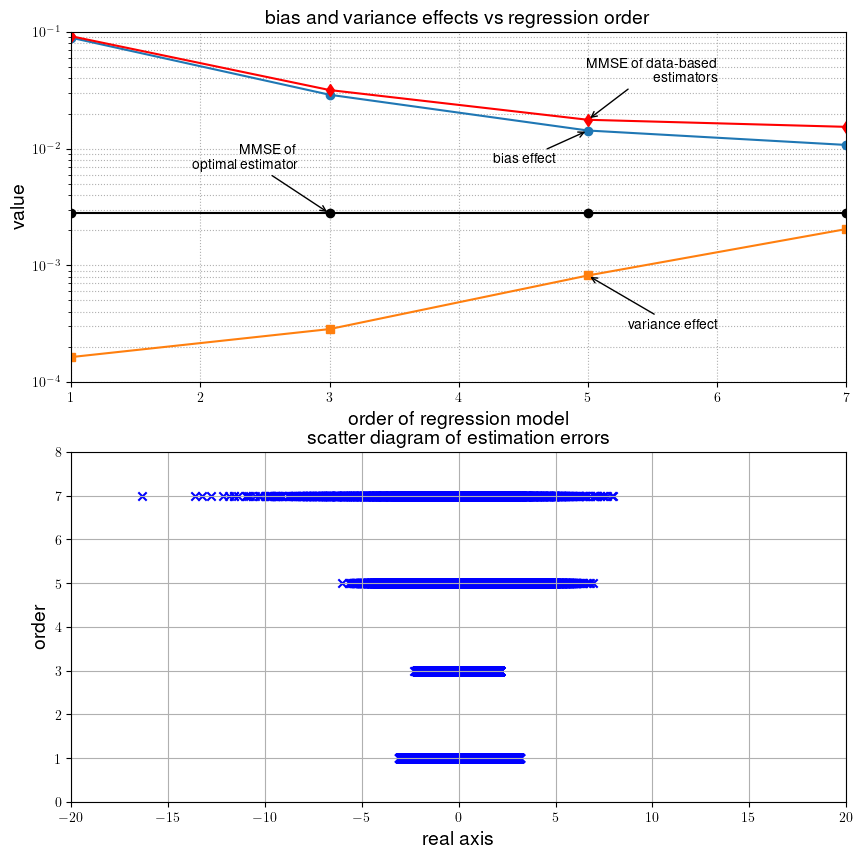

regression coefficients 1st order:
[0.00690427 0.92032985]
regression coefficients 3rd order:
[ 0.03171557  1.38147439 -0.0297298  -0.31718445]
regression coefficients 5th order:
[ 0.04191671  1.74310732 -0.08971906 -0.80584392  0.037048    0.13252157]
regression coefficients 7th order:
[ 0.03172824  2.13883046 -0.1194548  -1.64101569  0.10549484  0.60244766
 -0.02448179 -0.07350109]


In [2]:
# figure 11 (bias-variance relation)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Plotting the figures
fig = plt.figure(figsize=(10, 10))

# Subplot 1
plt.subplot(211)
plt.semilogy(order, mmse_opt, '-ko', label='optimal mmse')
plt.semilogy(order, bias_vec, '-o', label='bias effect')
plt.semilogy(order, var_vec, '-s', label='variance effect')
plt.semilogy(order, mmse_vec, '-rd', label='mmse')
plt.xlabel('order of regression model', fontsize=14)
plt.ylabel('value', fontsize=14)
plt.title('bias and variance effects vs regression order', fontsize=14)
plt.grid(which='both', linestyle='dotted')
plt.axis([1, 7, 1/10000, 1/10])


# Add some annotations to the plot
plt.annotate('MMSE of data-based \n estimators', xy= (5, mmse_vec[2]), xytext= (6, 2* mmse_vec[2]), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')
plt.annotate('bias effect', xy= (5, bias_vec[2]), xytext= (4.75, bias_vec[2]/2), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')
plt.annotate('MMSE of \n optimal estimator', xy= (3, mmse_opt[2]), xytext= (2.75, 2.3*mmse_opt[2]), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')
plt.annotate('variance effect', xy= (5, var_vec[2]), xytext= (6, var_vec[2]/3), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')

# Subplot 2
plt.subplot(212)
plt.scatter(D, np.ones(N * L), c='blue', marker='x')
plt.scatter(D2, 3 * np.ones(N * L), c='blue', marker='x')
plt.scatter(D3, 5 * np.ones(N * L), c='blue', marker='x')
plt.scatter(D4, 7 * np.ones(N * L), c='blue', marker='x')
plt.xlabel('real axis', fontsize=14)
plt.ylabel('order', fontsize=14)
plt.title('scatter diagram of estimation errors', fontsize=14)
plt.grid()
plt.axis([-20, 20, 0, 8])

plt.show()

# Display regression coefficients for different orders
print('regression coefficients 1st order:')
print(w_save.T)
print('regression coefficients 3rd order:')
print(w_save_2.T)
print('regression coefficients 5th order:')
print(w_save_3.T)
print('regression coefficients 7th order:')
print(w_save_4.T)

**Figure 27.11** *(Top)* Illustration of the bias and variance effects as a function of the order of the regression polynomial. The horizontal line in the top plot shows he MMSE of the optimal conditional estimator, $\mathbb{E}(x|y)$. *(Bottom)* Scatter diagrams for the estimation errors generated by suboptimal polynomial estimators of increasing order. It is seen that the variance of the errors increases with the order.

## Figure 27.8 (2D Gaussian distribution)

Figure $17.8$ plots a typical joint Gaussian distribution for scalar variables $\{\mathcal{x},\mathcal{y}\}$ for illustration purposes, along with its contour curves using 
$$\bar{x}=3,\;\;\bar{y}=4,\;\;R=\begin{bmatrix}2&1\\1&4\end{bmatrix} \tag{27.45}$$
The figure also shows the individual Gaussian distributions for the variables $\mathcal{x}$ and $\mathcal{y}$ separately.

parameters for Gaussian function:
[3, 4]
[[2 1]
 [1 4]]


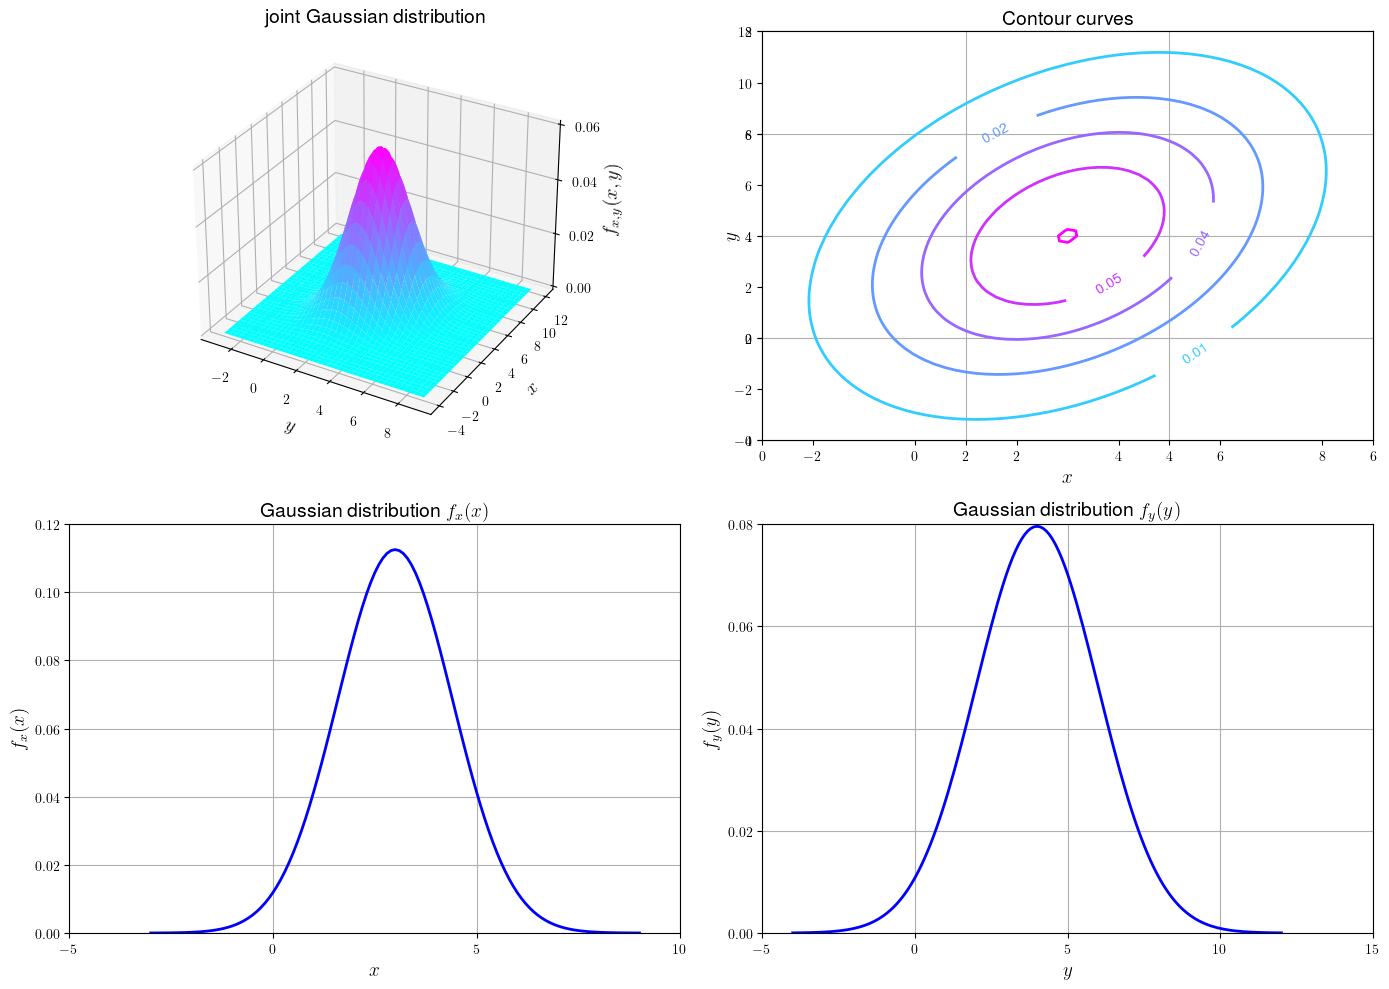

In [6]:
import numpy as np
import matplotlib.pyplot as plt

xbar = 3 # mean of x
ybar = 4 # mean of y
sigma_x_sq = 2 # variance of x
sigma_y_sq = 4 # variance of y
sigma_x_y =  1 # cross-correlation

R = np.array([ [sigma_x_sq, sigma_x_y], 
              [sigma_x_y, sigma_y_sq]])

k=0
step=0.1
fx = np.zeros(int((9 - (-3)) / step +1))
g = np.zeros([int((9 - (-3)) / step +1), int((12 - (-4)) / step +1)])
for x in np.arange(-3,9+step,step):
    m=0
    a = (1/(2*np.pi))*1/(np.sqrt(sigma_x_sq))
    b = -0.5*(x-xbar)**2/sigma_x_sq
    fx[k]=a*np.exp(b)
    
    for y in np.arange(-4,12+step,step):
       a = (1/(2*np.pi))*(1/(np.sqrt(np.linalg.det(R))))
       z = np.array([x-xbar, y-ybar])
       b = -0.5*z @ np.linalg.inv(R) @ z.T
       g[k,m] = a*np.exp(b)
       m = m+1
    k=k+1

m=0
fy = np.zeros(int((12 - (-4)) / step +1))
for y in np.arange(-4,12+step,step):
    a = (1/(2*np.pi))*1/(np.sqrt(sigma_y_sq))
    b = -0.5*(y-ybar)**2/sigma_y_sq
    fy[m]=a*np.exp(b)
    m=m+1

y=5
sigma2= sigma_x_sq - ((sigma_x_y)**2/sigma_y_sq)
mean = xbar + (sigma_x_y/sigma_y_sq)*(y-ybar)

m=0
fc = np.zeros(int((9 - (-3)) / step +1))
for x in np.arange(-3,9,step):
    a = (1/(2*np.pi))*1/(np.sqrt(sigma2))
    b = -0.5*(x-mean)**2/sigma2
    fc[m]=a*np.exp(b);  
    m=m+1

print('parameters for Gaussian function:')
print([xbar, ybar])
print(R)

#figure 8 (2D Gaussian distribution and contours)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Plotting the figures
fig = plt.figure(figsize=(14, 10))

# 3D Plot
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
xx = np.arange(-3.0, 9.0 +step, step)
yy = np.arange(-4.0, 12.0 +step, step)
X, Y = np.meshgrid(xx, yy)
Z = g.T
ax1.plot_surface(X, Y, Z, cmap='cool')
ax1.set_zticks(np.arange(0, 0.07, 0.02))
ax1.set_xlabel('$$y$$', fontsize=14)
ax1.set_ylabel('$$x$$', fontsize=14)
ax1.set_zlabel('$$f_{x,y}(x,y)$$', fontsize=14)
ax1.set_title('joint Gaussian distribution', fontsize=14)

# Contour Plot
xx = np.arange(-3, 9+ step, step)
yy = np.arange(-4, 12 +step, step)
X, Y = np.meshgrid(xx, yy)

ax2 = fig.add_subplot(2, 2, 2)
contour_plot = ax2.contour(X, Y, g.T, 10, cmap='cool', linewidths=1)

# Display text labels indicating the value of each contour line
ax2.clabel(contour_plot, fontsize=10, fmt='%1.2f')

# Select only the labels at every second contour line
selected_contours = contour_plot.levels[::2]

ax2 = fig.add_subplot(2, 2, 2)
# Create a new contour plot with the reduced number of contour levels
new_contour_plot = ax2.contour(X, Y, g.T, selected_contours, cmap='cool', linewidths=2)
ax2.clabel(new_contour_plot, fontsize=10, fmt='%1.2f')
ax2.set_xlabel(r'$x$', fontsize=14)
ax2.set_ylabel(r'$y$', fontsize=14)
ax2.set_title('Contour curves', fontsize=14)

# Add grid and set the axis limits
ax2.grid()
ax2.axis([0, 6, 0, 8])
ax2.set_xticks(np.arange(0, 7, 2))
ax2.set_yticks(np.arange(0, 9, 2))
ax2.set_xlim([0,6])
ax2.set_ylim([0,8])

# 2D Plot (First)
ax3 = fig.add_subplot(2, 2, 3)
x = np.arange(-3.0, 9.0 +step, step)
ax3.plot(x, fx, '-b', linewidth = 2)
ax3.set_xlabel(r'$x$', fontsize=14)
ax3.set_ylabel(r'$f_{x}(x)$', fontsize=14)
normal_text = "Gaussian distribution"
latex_expression = r'$f_{x}(x)$'
title_text = normal_text + " " + latex_expression
ax3.set_title(title_text, fontsize=14)
ax3.grid()
ax3.set_xticks(np.arange(-5, 11, 5))
ax3.set_yticks(np.arange(0, 0.13, 0.02))
ax3.set_xlim([-5,10])
ax3.set_ylim([0,0.12])

# 2D Plot (Second)
ax4 = fig.add_subplot(2, 2, 4)
xx = np.arange(-4.0, 12.0 +step, step)
ax4.plot(xx, fy, '-b', linewidth = 2)
ax4.set_xlabel(r'$y$', fontsize=14)
ax4.set_ylabel(r'$f_{y}(y)$', fontsize=14)
latex_expression = r'$f_{y}(y)$'
title_text = normal_text + " " + latex_expression
ax4.set_title(title_text, fontsize=14)
ax4.grid()
ax4.set_xticks(np.arange(-5, 16, 5))
ax4.set_yticks(np.arange(0, 0.09, 0.02))
ax4.set_xlim([-5,15])
ax4.set_ylim([0,0.08])

plt.tight_layout()
plt.show()

**Figure 27.8** *(Top)* A joint Gaussian distribution $f_{x, y}(x, y)$ with parameters given by (27.45) along with its contour curves. *(Bottom)* Individual Gaussian distributions for the variables $x$ and $y$.